## Пример работы машинного обучения

In [ ]:
from random import randint
TRAIN_SET_LIMIT = 1000
TRAIN_SET_COUNT = 100

TRAIN_INPUT = list()
TRAIN_OUTPUT = list()
for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
    op = a + (2*b) + (3*c)
    TRAIN_INPUT.append([a, b, c])
    TRAIN_OUTPUT.append(op)

In [ ]:
from sklearn.linear_model import LinearRegression

predictor = LinearRegression(n_jobs=-1)
predictor.fit(X=TRAIN_INPUT, y=TRAIN_OUTPUT)

In [ ]:
X_TEST = [[10, 20, 30]]
outcome = predictor.predict(X=X_TEST)
coefficients = predictor.coef_

print('Outcome : {}\nCoefficients : {}'.format(outcome, coefficients))

## Загрузка данных по чугунам

In [14]:
import copy
import pandas as pd
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_excel('Чугуны ТПЦ7 033 Алесь.xlsx')
drop_columns = [
    "Unnamed: 0", "E*", "E.1", "E*.1", "Hs.1", "Hd.1", "e.1", "Gd*", "Gв", "Unnamed: 25", "G 12",
]
df = df.drop(columns=drop_columns)
df_hb = copy.deepcopy(df.drop(columns="E 12").dropna())

df_e = df.drop(columns="HB").dropna()

In [17]:
y_df_hb = df_hb["HB"]

x_df_hb = df_hb.drop(columns="HB")
y_df_e = df_e["E 12"]
x_df_e = df_e.drop(columns="E 12")

x_hb_train, x_hb_test, y_hb_train, y_hb_test = train_test_split(x_df_hb, y_df_hb, 
                                                train_size=0.8, 
                                                random_state=46)

x_hb_train_no_hs = x_hb_train.drop(columns="Hs") 
x_hb_test = x_hb_test.drop(columns="Hs")
y_hb_train_hs = x_hb_train["Hs"]

x_e_train, x_e_test, y_e_train, y_e_test = train_test_split(x_df_e, y_df_e, 
                                                train_size=0.8, 
                                                random_state=40)

In [18]:
hb_predictor = LinearRegression(n_jobs=-1)
hb_predictor.fit(X=x_hb_train_no_hs, y=y_hb_train)

predicted_hb = hb_predictor.predict(x_hb_test)
nevyazka_hb = hb_predictor.predict(x_hb_train_no_hs)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_hb_test, predicted_hb))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_hb_test, predicted_hb))
plt.scatter(y_hb_train, nevyazka_hb)
plt.scatter(y_hb_test, predicted_hb)
plt.scatter(y_hb_train, y_hb_train_hs)

plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Hs


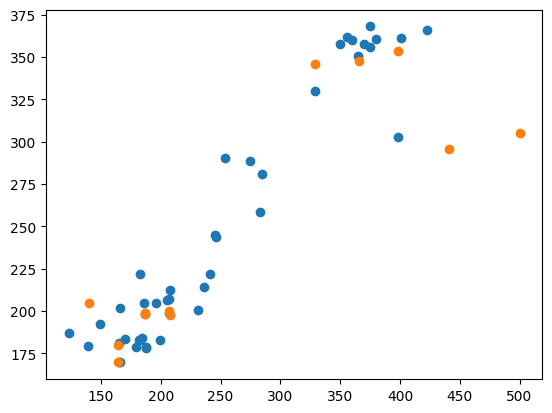

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR


regr = make_pipeline(StandardScaler(), SVR(C=30))
regr.fit(x_hb_train, y_hb_train)

predicted_hb = regr.predict(x_hb_test)
nevyazka_hb = regr.predict(x_hb_train)

plt.scatter(y_hb_train, nevyazka_hb)
plt.scatter(y_hb_test, predicted_hb)

plt.show()

Mean squared error: 159312303807306006528.00
Coefficient of determination: 0.63


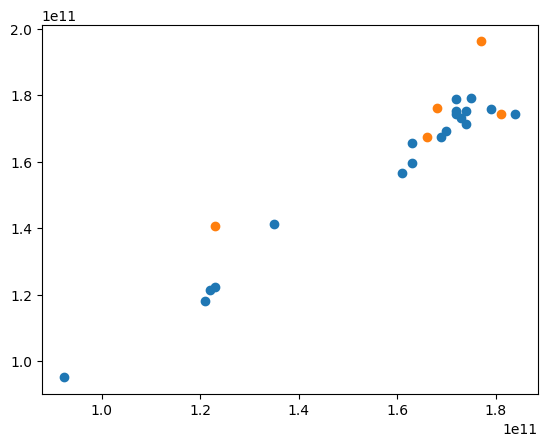

In [7]:
e_predictor = LinearRegression(n_jobs=-1)
e_predictor.fit(X=x_e_train, y=y_e_train)

predicted_e = e_predictor.predict(x_e_test)
nevyazka_e = e_predictor.predict(x_e_train)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_e_test, predicted_e))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_e_test, predicted_e))
plt.scatter(y_e_train, nevyazka_e)
plt.scatter(y_e_test, predicted_e)

plt.show()